# DNN (Deep Neural Networks)

## Gradient Descent

Before jumping right into neural networks let's look at a simple idea of how we can perform gradient descent.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

Let's say we have a simple line $y=5x+2$.

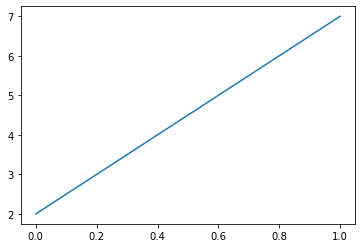

In [4]:
X = np.linspace(0, 1, 100)
y = 5 * X + 2

plt.plot(X, y)
plt.show()

So the model will have two coefficients - $k, b$. For sure it's easy to solve it analytically and it's an overkill to use gradient descent, but this is just for illustration purposes. The idea is super simple - let's move into the direction which leads to lower cost (error).

<img src="https://miro.medium.com/max/1005/1*_6TVU8yGpXNYDkkpOfnJ6Q.png" style="width: 50%"/>

For regression task it is common to use MSE loss $(\hat{y} - y)^2$. It's derivative is just $2(\hat{y} - y)$, thus we get

In [5]:
X

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [6]:
y

array([2.        , 2.05050505, 2.1010101 , 2.15151515, 2.2020202 ,
       2.25252525, 2.3030303 , 2.35353535, 2.4040404 , 2.45454545,
       2.50505051, 2.55555556, 2.60606061, 2.65656566, 2.70707071,
       2.75757576, 2.80808081, 2.85858586, 2.90909091, 2.95959596,
       3.01010101, 3.06060606, 3.11111111, 3.16161616, 3.21212121,
       3.26262626, 3.31313131, 3.36363636, 3.41414141, 3.46464646,
       3.51515152, 3.56565657, 3.61616162, 3.66666667, 3.71717172,
       3.76767677, 3.81818182, 3.86868687, 3.91919192, 3.96969697,
       4.02020202, 4.07070707, 4.12121212, 4.17171717, 4.22222222,
       4.27272727, 4.32323232, 4.37373737, 4.42424242, 4.47474747,
       4.52525253, 4.57575758, 4.62626263, 4.67676768, 4.72727273,
       4.77777778, 4.82828283, 4.87878788, 4.92929293, 4.97979798,
       5.03030303, 5.08080808, 5.13131313, 5.18181818, 5.23232323,
       5.28282828, 5.33333333, 5.38383838, 5.43434343, 5.48484848,
       5.53535354, 5.58585859, 5.63636364, 5.68686869, 5.73737

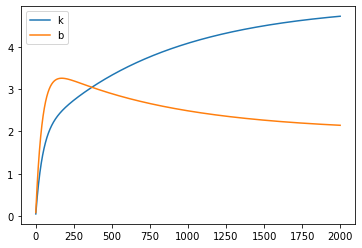

In [13]:
k, b = 0, 0     # initial values
epochs = 2000
learning_rate = 0.009

L = []   # storage for k and b through training
for i in range(epochs):
    pred = k * X + b
    # Compute the gradients for k and b
    dk = -2 * np.mean(X * (y - pred))
    db = -2 * np.mean(y - pred)
    # Update k and b using the gradients
    k -= learning_rate * dk
    b -= learning_rate * db
    L.append([k, b])

pd.DataFrame(L, columns=['k', 'b']).plot()
plt.show()

Note, that gradient descent is sensitive to the step size. We will meet some solutions to this problem in the future.

<img src="https://www.researchgate.net/profile/Tom_Duckett/publication/224324276/figure/fig2/AS:359779089305617@1462789427971/Convergence-Conditions-in-Gradient-Descent-Algorithm.png" style="width: 50%"/>

Try to play around with learning rate and see it for yourself.

Also gradient descent is not guaranteed to find global minimum, but when we work with high dimensional data this risk partly wanishes.

<img src="https://paper-attachments.dropbox.com/s_F57E27FDF0C54777F2844EECCBABB7DF8EEB9597E5F323F9CC73F1690617FCAD_1569311505423_image.png" style="width: 50%"/>

You can use the same trick to fit a line over multiple points. Training process should look similar to that:

<img src="https://paper-attachments.dropbox.com/s_F57E27FDF0C54777F2844EECCBABB7DF8EEB9597E5F323F9CC73F1690617FCAD_1567686156887_grad_desc_demo.gif" style="width: 50%"/>

## Timeline

<img src="https://cdn-images-1.medium.com/max/2000/1*Z_DnCyKt18RM0aCCrFzaIQ.png" style="width: 80%"/>

ANNs have been around for quite a while: they were first introduced back in **1943** by the neurophysiologist Warren **McCulloch** and the mathematician Walter **Pitts** (see “A Logical Calculus of Ideas Immanent in Nervous Activity”).

<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571117028252_image.png" style="width: 50%"/>

<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571117050006_image.png" style="width: 50%"/>

Most of the pictures are taken from the great book "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition" by Aurélien Géron.

## The Perceptron

The *Perceptron* is one of the simplest ANN architectures, invented in **1957** by Frank **Rosenblatt**. It is based on a slightly different artificial neuron called a *threshold logic unit* (TLU), or sometimes a *linear threshold unit* (LTU). A Perceptron is simply composed of a single layer of TLUs, with each TLU connected to all the inputs. 

<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571117134137_image.png" alt="Threshold logic unit: an artificial neuron which computes a weighted sum of its inputs then applies a step function" style="width: 50%"/>

<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571117253013_image.png" alt="Architecture of a Perceptron with two input neurons, one bias neuron, and three output neurons" style="width: 50%"/>

Lets see how is a Perceptron trained.

The Perceptron training algorithm proposed by **Rosenblatt** was largely inspired by ***Hebb’s rule***. In his **1949** book *The Organization of Behavior* (Wiley), Donald Hebb suggested that when a biological neuron triggers another neuron often, the connection between these two neurons grows stronger. Siegrid Löwel later summarized Hebb’s idea in the catchy phrase, “Cells that fire together, wire together”; that is, the connection weight between two neurons tends to increase when they fire simultaneously. This rule later became known as Hebb’s rule (or *Hebbian learning*).

<img src="https://paper-attachments.dropbox.com/s_DC20E26BBCBCDC1CE35F486489133207E7462B05AFD4747CE4118D2918E8D180_1580039607658_Screenshot+2020-01-26+13.52.47.png" style="width: 70%"/>

The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers). However, if the training instances are linearly separable, **Rosenblatt** demonstrated that this algorithm would converge to a solution. This is called the **Perceptron convergence theorem**.

### Perceptron for 2 class case

We will produce following perceptron from scratch

<img src="https://miro.medium.com/max/2870/1*n6sJ4yZQzwKL9wnF5wnVNg.png" style="width: 60%"/>

but first we need some data first. We will work with iris dataset.

In [17]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['class'] = iris.target_names[iris.target]

We want a way to plot it, but it has 4 dimensions. PCA to the rescue.

In [18]:
pca = PCA(2)
df['pc_1'], df['pc_2'] = pca.fit_transform(df.iloc[:, :4]).T

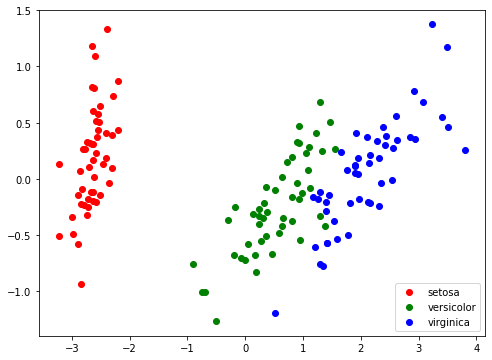

In [32]:
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

fig, ax = plt.subplots(figsize=(8, 6))
for label, c in colors.items():
    ax.scatter(x=df[df['class'] == label]['pc_1'],
               y=df[df['class'] == label]['pc_2'],
               c=c,
               label=label)

ax.legend()
plt.show()

We will work only with two class case for now, thus let's change the labels by leaving one class and treating all other points as a second class.

In [40]:
CLASS = 'versicolor'

# Prepare data for 2 class test
y = (df['class'] == CLASS).astype('int').values
X = df.iloc[:, :4]

# Apply standart scaler
X = ((X - X.mean()) / X.std()).values

# Add ones for intercept
X = np.hstack([X, np.ones((X.shape[0], 1))])

# Make mask for tain/test set
np.random.seed(42)
mask = np.random.random(X.shape[0]) < 0.7

N, M = X.shape

In [41]:
X_train = X[mask]
X_test = X[~mask]

Now we are ready to try our Perceptron.

In [42]:
epochs = 100
learning_rate = 0.1

# Initial weights between 0 and 1
np.random.seed(42)
W = np.random.random(M)

for _ in range(epochs):
    # Train only on train set
    for features, label in zip(X[mask], y[mask]):
        pred = 1 if np.dot(features, W) > 0 else 0     # step function
        W -= learning_rate * (pred - label) * features

pred_train = np.dot(X[mask], W) > 0
pred_test = np.dot(X[~mask], W) > 0
print('Hit rate (train set) - {0:.02%}, Hit rate (test set) - {1:.02%}'.format(
    (pred_train == y[mask]).mean(), (pred_test == y[~mask]).mean()))

Hit rate (train set) - 34.29%, Hit rate (test set) - 35.56%


Well, clearly it's easy to sepperate setosa from other two classes. Try to change target class to versicolor and virginica.

### Power of perceptron formulation

Perceptron definition is quite flexible and modifying loss and activation allows to replicate some whell known algorithms, see picture taken from “Neural Networks and Deep Learning: A Textbook” (book by Charu C. Aggarwal).

<img src="https://paper-attachments.dropbox.com/s_2E4854D97CFCA11CB3874DE15FA048AD21CE628C357A5C14D6A303FEC847FA36_1596967818835_image.png" style="width: 60%"/>

All of this flexibility and initial results led people to believe that AI is just behind the corner. This is clearly seen in movies, books, conferences, papers, etc.

<img src="https://paper-attachments.dropbox.com/s_2E4854D97CFCA11CB3874DE15FA048AD21CE628C357A5C14D6A303FEC847FA36_1596968518047_Screenshot+2020-08-09+at+13.21.56.png" style="width: 60%"/>

## Beginning of first AI winter

Researchers strongy believed that perceptrons can and will solve hard problems. In **1966** Marvin Minskey together with Seymour Papert as a summer project for his students gave a task to solve computer vision. Task was to split image into regions of likely objects and background areas and perform object classification. It turned out to be much harder than they anticipated. We will soon construct object classifier, if you are interested in background detection read about U-Net. 

In their **1969** monograph *Perceptrons*, Marvin Minsky and Seymour Papert (same guys after 3 years) highlighted a number of serious weaknesses of Perceptrons—in particular, the fact that they are incapable of solving some trivial problems (e.g., the *Exclusive OR* (XOR) classification problem.
It turns out that some of the limitations of Perceptrons can be eliminated by stacking multiple Perceptrons (or using ADA activation)!

<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571117686838_image.png"  style="width: 50%"/>

But, we have no idea how to train those stacked Perceptorns (DNN - deep neural nets). And also there are no big enough datasets or resources to try this out...

<img src="https://miro.medium.com/max/2101/1*mWYZanOv3QUafz0nnhbEWw.png"  style="width: 50%"/>

## Backpropagation

When an ANN contains a deep stack of hidden layers, it is called a ***deep neural network*** **(DNN)**.

<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571117766740_image.png" alt="Architecture of a Multilayer Perceptron" style="width: 50%"/>

For many years researchers struggled to find a way to train MLPs, without success. But in **1986**, David **Rumelhart**, Geoffrey **Hinton**, and Ronald **Williams** published a groundbreaking paper (“Learning Internal Representations by Error Propagation”) that introduced the **backpropagation** training algorithm, which is still used today.

Actually backpropagation was known prior to 1986 (Paul Werbos, 1975)

<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571320041201_image.png" alt="Paul Werbos, 1975" style="width: 50%"/>

In short, it is Gradient Descent using an efficient technique for computing the gradients automatically: in just **two passes** through the network (one **forward**, one **backward**), the backpropagation algorithm is able to compute the gradient of the network’s error with regard to every single model parameter.

<img src="https://miro.medium.com/max/3040/1*q1M7LGiDTirwU-4LcFq7_Q.png" style="width: 50%"/>

Automatically computing gradients is called *automatic differentiation*, or *autodiff*. There are various autodiff techniques, with different pros and cons. The one used by backpropagation is called *reverse-mode autodiff*.

### Two layer NN for 2 class case

<img src="https://miro.medium.com/max/1000/1*sX6T0Y4aa3ARh7IBS_sdqw.png" style="width: 40%"/>

In [44]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
diff = lambda x: x * (1 - x)

hidden = 4
learning_rate = 0.01
epochs = 500

# Initial weights between 0 and 1
np.random.seed(42)
W_0 = np.random.randn(M, hidden)
W_1 = np.random.randn(hidden, 1)

In [48]:
X.shape

(150, 5)

In [50]:
W_0.shape

(5, 4)

In [51]:
W_1.shape

(4, 1)

Following code implements **back propagation** using gradient descent.

<img src="https://kratzert.github.io/images/bn_backpass/chainrule_example.PNG" style="width: 80%"/>

Note, that gradient shows how much the result will change if the input is increased by 1 unit, for example:

![Gradients](img/gradients.png)

For extensive chain rule back propagation explanation see [this blog post](https://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html) or a great lecture from Andrej Karpathy on [building micrograd](https://www.youtube.com/watch?v=VMj-3S1tku0).

In [56]:
for _ in range(epochs):
    # Forward pass (make prediction)
    L_1 = sigmoid(X[mask].dot(W_0))
    L_2 = sigmoid(L_1.dot(W_1))
    # Backward pass (propagate diff)
    diff_2 = (y[mask, np.newaxis] - L_2) * diff(L_2)
    diff_1 = np.dot(diff_2, W_1.T) * diff(L_1)
    W_1 += learning_rate * np.dot(L_1.T, diff_2)
    W_0 += learning_rate * np.dot(X[mask].T, diff_1)

pred_train = (sigmoid(sigmoid(X[mask].dot(W_0)).dot(W_1)) > 0.5).flatten()
pred_test = (sigmoid(sigmoid(X[~mask].dot(W_0)).dot(W_1)) > 0.5).flatten()
print('Hit rate (train set) - {0:.02%}, Hit rate (test set) - {1:.02%}'.format(
    (pred_train == y[mask]).mean(), (pred_test == y[~mask]).mean()))

Hit rate (train set) - 97.14%, Hit rate (test set) - 95.56%


**TASK:** Change the class from `CLASS = 'setosa'` and see if non-linearity works. Play with this visualization - https://www.geogebra.org/m/a5x9szmc to get a sense why. Finally go to [TensorFlow Playground](http://playground.tensorflow.org/) to get even more intuition on how this works on blobs, rings, spirals, etc.

## MNIST (Application of backprop by Yann LeCun, 1989)

<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571320140589_image.png" style="width: 50%"/>
<img src="https://camo.githubusercontent.com/807102dc1f1f17a1318535548d05d54867135be2/68747470733a2f2f6d6c34612e6769746875622e696f2f696d616765732f666967757265732f6d6e6973742d696e7075742e706e67" style="width: 50%"/>
<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571320219769_image.png" alt="Before training" style="width: 50%"/>
<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571320227765_image.png" alt="After training" style="width: 50%"/>
<img src="https://paper-attachments.dropbox.com/s_1F3ADB50AE0E9BFFE47A31C329F32861D3C6E5DDE635C337B9BB647E093C8832_1571118051404_image.png" style="width: 50%"/>

In [77]:
from torchvision import datasets

In [78]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, download=True)

In [79]:
X_train = train_dataset.data.numpy()
y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()

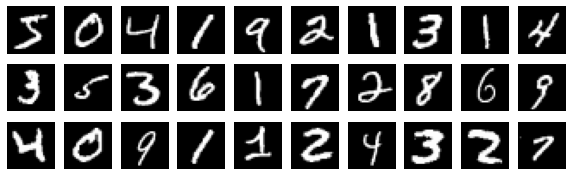

In [80]:
# Normalize
X_train = X_train / 255
X_test = X_test / 255

plt.figure(figsize=(10, 3))
for i in range(30):
    plt.subplot(3, 10, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

Before jumping to PyTorch let's see of how this would look like if we try to build it from scratch.

The idea lies on:
- softmax
- cross-entropy loss

We will work out details in the lecture, but our NN ends up to be quite simple. We need to flatten data first.

In [81]:
X_train_flat = X_train.reshape((X_train.shape[0], 28*28))
X_test_flat = X_test.reshape((X_test.shape[0], 28*28))

y_train_one_hot = np.eye(10)[y_train]
y_test_one_hot = np.eye(10)[y_test]

And then just train using gradient descent and backprop rule.

In [82]:
%%time

sigmoid = lambda x: 1 / (1 + np.exp(-x))
diff = lambda x: x * (1 - x)

def softmax(z):
    z_exp = np.exp(z - z.max(axis=1, keepdims=True))
    return z_exp / z_exp.sum(axis=1, keepdims=True)

hidden = 50
learning_rate = 0.01
batch_size = 100
epochs = 20

# Initial weights between 0 and 1
np.random.seed(42)
W_0 = np.random.uniform(size=(28*28, hidden), low=-1, high=1)
W_1 = np.random.uniform(size=(hidden, 10), low=-1, high=1)

for e in range(epochs):
    print(f'Running epoch {e}')
    for i in range(0, len(X_train), batch_size):
        X = X_train_flat[i:i+batch_size]
        y = y_train_one_hot[i:i+batch_size]
        # Forward pass (make prediction)
        L_1 = sigmoid(X.dot(W_0))
        L_2 = softmax(L_1.dot(W_1))
        # Backward pass (propagate diff)
        diff_2 = L_2 - y
        diff_1 = np.dot(diff_2, W_1.T) * diff(L_1)
        W_1 -= learning_rate * np.dot(L_1.T, diff_2)
        W_0 -= learning_rate * np.dot(X.T, diff_1)

    pred_train = sigmoid(sigmoid(X_train_flat.dot(W_0)).dot(W_1)).argmax(axis=1)
    pred_test = sigmoid(sigmoid(X_test_flat.dot(W_0)).dot(W_1)).argmax(axis=1)
    print('Hit rate (train set) - {0:.02%}, Hit rate (test set) - {1:.02%}'.format(
        (pred_train == y_train).mean(), (pred_test == y_test).mean()))

Running epoch 0
Hit rate (train set) - 90.83%, Hit rate (test set) - 90.95%
Running epoch 1
Hit rate (train set) - 93.02%, Hit rate (test set) - 92.66%
Running epoch 2
Hit rate (train set) - 94.15%, Hit rate (test set) - 93.57%
Running epoch 3
Hit rate (train set) - 94.80%, Hit rate (test set) - 94.14%
Running epoch 4
Hit rate (train set) - 95.28%, Hit rate (test set) - 94.51%
Running epoch 5
Hit rate (train set) - 95.68%, Hit rate (test set) - 94.75%
Running epoch 6
Hit rate (train set) - 96.02%, Hit rate (test set) - 95.00%
Running epoch 7
Hit rate (train set) - 96.31%, Hit rate (test set) - 95.26%
Running epoch 8
Hit rate (train set) - 96.55%, Hit rate (test set) - 95.34%
Running epoch 9
Hit rate (train set) - 96.74%, Hit rate (test set) - 95.43%
Running epoch 10
Hit rate (train set) - 96.90%, Hit rate (test set) - 95.54%
Running epoch 11
Hit rate (train set) - 97.02%, Hit rate (test set) - 95.63%
Running epoch 12
Hit rate (train set) - 97.19%, Hit rate (test set) - 95.72%
Running e

Can we make it faster using PyTorch?

In [83]:
import torch
import time

def benchmark(device, n=1000):
    """
    Perform matrix multiplication on the given device.
    
    Args:
    - device (str): 'cuda' or 'cpu'
    - n (int): Size of the matrix (n x n)
    
    Returns:
    - float: Elapsed time in seconds for the operation
    """
    
    # Create two random matrices
    a = torch.rand(n, n, device=device)
    b = torch.rand(n, n, device=device)
    
    # Warm up (ensure any startup overhead is handled)
    for _ in range(10):
        _ = torch.mm(a, b)
    
    # Measure the time it takes to perform the matrix multiplication
    start_time = time.time()
    for _ in range(100):
        _ = torch.mm(a, b)
    end_time = time.time()
    
    return end_time - start_time


if torch.cuda.is_available():
    gpu_time = benchmark('cuda')
    print(f"Matrix multiplication on GPU took {gpu_time:.4f} seconds.")
else:
    print("CUDA is not available.")

if torch.backends.mps.is_available():
    gpu_time = benchmark('mps')
    print(f"Matrix multiplication on GPU took {gpu_time:.4f} seconds.")
else:
    print("MPS is not available.")

cpu_time = benchmark('cpu')
print(f"Matrix multiplication on CPU took {cpu_time:.4f} seconds.")

CUDA is not available.
Matrix multiplication on GPU took 0.0045 seconds.
Matrix multiplication on CPU took 0.1868 seconds.


Let's move from numpy to PyTorch.

In [84]:
# Assuming train_dataset and test_dataset are PyTorch Datasets
X_train = train_dataset.data.float() / 255
y_train = train_dataset.targets
X_test = test_dataset.data.float() / 255
y_test = test_dataset.targets

# Flatten the images
X_train_flat = X_train.view(X_train.shape[0], -1)
X_test_flat = X_test.view(X_test.shape[0], -1)

# One-hot encoding of labels
y_train_one_hot = torch.nn.functional.one_hot(y_train, num_classes=10).float()
y_test_one_hot = torch.nn.functional.one_hot(y_test, num_classes=10).float()

In [85]:
%%time

# Define sigmoid and its derivative
sigmoid = lambda x: 1 / (1 + torch.exp(-x))
diff = lambda x: x * (1 - x)

def softmax(z):
    z_exp = torch.exp(z - z.max(dim=1, keepdim=True).values)
    return z_exp / z_exp.sum(dim=1, keepdim=True)

hidden = 50
learning_rate = 0.01
batch_size = 100
epochs = 20

# Make sure your GPU is available, otherwise fall back to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initial weights
torch.manual_seed(42)
W_0 = torch.rand(28*28, hidden, device=device, dtype=torch.float32) * 2 - 1
W_1 = torch.rand(hidden, 10, device=device, dtype=torch.float32) * 2 - 1

X_train_flat, y_train_one_hot = X_train_flat.to(device), y_train_one_hot.to(device)
X_test_flat, y_test_one_hot = X_test_flat.to(device), y_test_one_hot.to(device)

for e in range(epochs):
    print(f'Running epoch {e}')
    for i in range(0, X_train_flat.size(0), batch_size):
        X = X_train_flat[i:i+batch_size]
        y = y_train_one_hot[i:i+batch_size]
        # Forward pass
        L_1 = sigmoid(torch.mm(X, W_0))
        L_2 = softmax(torch.mm(L_1, W_1))
        # Backward pass
        diff_2 = L_2 - y
        diff_1 = torch.mm(diff_2, W_1.t()) * diff(L_1)
        W_1 -= learning_rate * torch.mm(L_1.t(), diff_2)
        W_0 -= learning_rate * torch.mm(X.t(), diff_1)

    with torch.no_grad():
        pred_train = sigmoid(torch.mm(sigmoid(torch.mm(X_train_flat, W_0)), W_1)).argmax(dim=1).cpu().numpy()
        pred_test = sigmoid(torch.mm(sigmoid(torch.mm(X_test_flat, W_0)), W_1)).argmax(dim=1).cpu().numpy()

    print('Hit rate (train set) - {0:.02%}, Hit rate (test set) - {1:.02%}'.format(
        (pred_train == y_train.numpy()).mean(), (pred_test == y_test.numpy()).mean()))

Running epoch 0
Hit rate (train set) - 90.22%, Hit rate (test set) - 90.11%
Running epoch 1
Hit rate (train set) - 92.62%, Hit rate (test set) - 92.19%
Running epoch 2
Hit rate (train set) - 93.86%, Hit rate (test set) - 92.99%
Running epoch 3
Hit rate (train set) - 94.64%, Hit rate (test set) - 93.75%
Running epoch 4
Hit rate (train set) - 95.23%, Hit rate (test set) - 94.06%
Running epoch 5
Hit rate (train set) - 95.68%, Hit rate (test set) - 94.44%
Running epoch 6
Hit rate (train set) - 96.06%, Hit rate (test set) - 94.80%
Running epoch 7
Hit rate (train set) - 96.35%, Hit rate (test set) - 95.06%
Running epoch 8
Hit rate (train set) - 96.55%, Hit rate (test set) - 95.29%
Running epoch 9
Hit rate (train set) - 96.75%, Hit rate (test set) - 95.41%
Running epoch 10
Hit rate (train set) - 96.94%, Hit rate (test set) - 95.53%
Running epoch 11
Hit rate (train set) - 97.09%, Hit rate (test set) - 95.66%
Running epoch 12
Hit rate (train set) - 97.22%, Hit rate (test set) - 95.68%
Running e

## PyTorch all the way

From now on we will use PyTorch to create our models. It will take care of backprop and differentiation, thus we only need to define the NN architecture!

In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [127]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

In [128]:
net = Net()

In [140]:
tensor = torch.tensor(np.array([1,2,3]))

In [144]:
train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                               torch.tensor(y_train, dtype=torch.int64))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                                              torch.tensor(y_test, dtype=torch.int64))
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=256)

/var/folders/71/2t6j6ytn1t3dfp5dxb9zhh6w0000gn/T/ipykernel_3232/2847555845.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32),
/var/folders/71/2t6j6ytn1t3dfp5dxb9zhh6w0000gn/T/ipykernel_3232/2847555845.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y_train, dtype=torch.int64))
/var/folders/71/2t6j6ytn1t3dfp5dxb9zhh6w0000gn/T/ipykernel_3232/2847555845.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = torch.utils.dat

In [153]:
epochs = 20

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.02)

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.view(-1, 28*28)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    avg_epoch_loss = running_loss / len(train_loader)
    print(f'Epoch {epoch} loss {avg_epoch_loss:.04f}')

Epoch 0 loss 2.2455
Epoch 1 loss 2.0814
Epoch 2 loss 1.8348
Epoch 3 loss 1.5478
Epoch 4 loss 1.3011
Epoch 5 loss 1.1163
Epoch 6 loss 0.9803
Epoch 7 loss 0.8773
Epoch 8 loss 0.7973
Epoch 9 loss 0.7335
Epoch 10 loss 0.6816
Epoch 11 loss 0.6392
Epoch 12 loss 0.6031
Epoch 13 loss 0.5728
Epoch 14 loss 0.5466
Epoch 15 loss 0.5243
Epoch 16 loss 0.5046
Epoch 17 loss 0.4878
Epoch 18 loss 0.4727
Epoch 19 loss 0.4585


Structurally this is the same network we had before, thus our error rate is expected to be simmilar.

In [156]:
model.eval()

P = []
with torch.no_grad():
    for tag, loader in [('train', train_loader),
                        ('test', test_loader)]:
        correct, total = 0, 0
        for images, labels in loader:
            images = images.view(-1, 28*28)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            if tag == 'test':
                P.append(predicted)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        hit_rate = correct / total
        print(f'Hit rate {tag} - {hit_rate:.02%}')

Hit rate train - 88.60%
Hit rate test - 89.10%


Let's explore some predictions.

In [157]:
pred = np.concatenate(P)

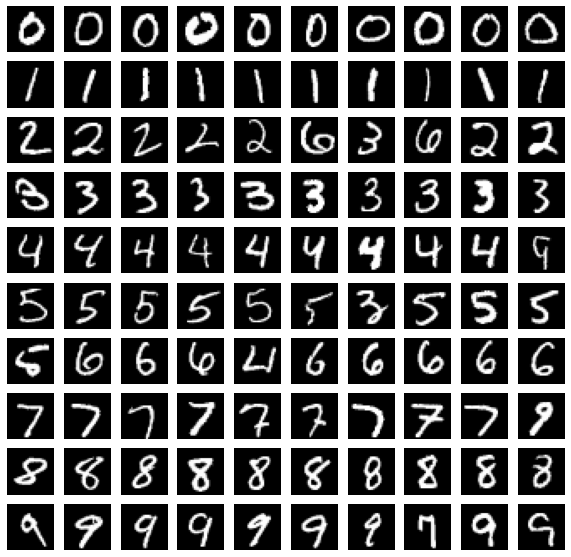

In [158]:
plt.figure(figsize=(10, 10))
for label in range(10):
    for i in range(10):
        plt.subplot(10, 10, label * 10 + i + 1)
        plt.imshow(X_test[pred == label][i], cmap='gray')
        plt.axis('off')
plt.show()

Let's look only at misclassifiesd cases.

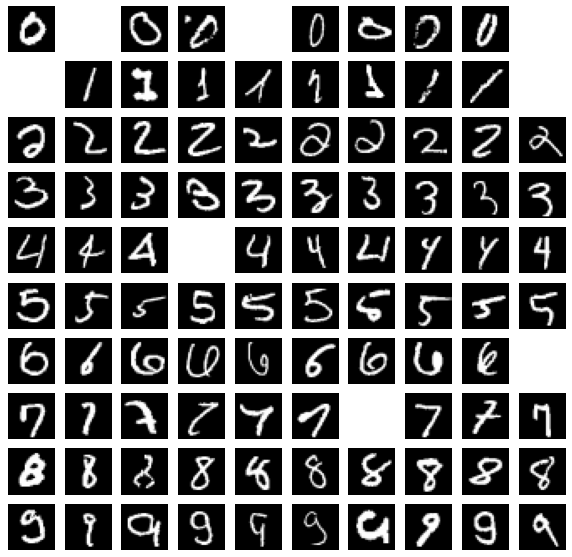

In [159]:
plt.figure(figsize=(10, 10))
for label in range(10):
    for i in range(10):
        plt.subplot(10, 10, label * 10 + i + 1)
        mask = (pred == i) & (y_test.numpy() == label)
        if mask.sum() > 0:
            plt.imshow(X_test[mask][0], cmap='gray')
        plt.axis('off')
plt.show()

As you might remember Random Forest achieved similar accuracy so why do we need NN then? Well, let's try to increse number of parameters in our network.

In [160]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [164]:
1024 * 1024 * 1024

1073741824

In [163]:
epochs = 20
device = 'mps'  # Make sure to replace 'mps' with 'cuda' if using NVIDIA GPUs or 'cpu' if you don't have access to GPU.

model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.02)

for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for images, labels in train_loader:
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_epoch_loss = running_loss / len(train_loader)
    training_accuracy = correct_predictions / total_predictions * 100
    print(f'Epoch {epoch}, Loss: {avg_epoch_loss:.04f}, Training Accuracy: {training_accuracy:.02f}%')

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    val_correct_predictions = 0
    val_total_predictions = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(-1, 28*28).to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            val_total_predictions += labels.size(0)
            val_correct_predictions += (predicted == labels).sum().item()

    avg_val_loss = val_running_loss / len(test_loader)
    validation_accuracy = val_correct_predictions / val_total_predictions * 100
    print(f'Validation Loss: {avg_val_loss:.04f}, Validation Accuracy: {validation_accuracy:.02f}%\n')

Epoch 0, Loss: 2.2736, Training Accuracy: 35.30%
Validation Loss: 2.2207, Validation Accuracy: 58.30%

Epoch 1, Loss: 1.9658, Training Accuracy: 61.32%
Validation Loss: 1.4096, Validation Accuracy: 67.55%

Epoch 2, Loss: 0.9266, Training Accuracy: 76.43%
Validation Loss: 0.6412, Validation Accuracy: 81.65%

Epoch 3, Loss: 0.5516, Training Accuracy: 84.47%
Validation Loss: 0.4663, Validation Accuracy: 86.38%

Epoch 4, Loss: 0.4372, Training Accuracy: 87.66%
Validation Loss: 0.3900, Validation Accuracy: 88.41%

Epoch 5, Loss: 0.3816, Training Accuracy: 89.09%
Validation Loss: 0.3520, Validation Accuracy: 89.64%

Epoch 6, Loss: 0.3482, Training Accuracy: 90.13%
Validation Loss: 0.3363, Validation Accuracy: 90.27%

Epoch 7, Loss: 0.3234, Training Accuracy: 90.75%
Validation Loss: 0.2993, Validation Accuracy: 91.12%

Epoch 8, Loss: 0.3036, Training Accuracy: 91.36%
Validation Loss: 0.2819, Validation Accuracy: 91.56%

Epoch 9, Loss: 0.2858, Training Accuracy: 91.81%
Validation Loss: 0.2666,

Thats better! For examply by using layers 1500, 1000, 500, 10 you can improve accuracy to ~98.24%, but training will take quite some time. Actually you can go even futher with simple data augmentation techniques - https://arxiv.org/pdf/1003.0358.pdf

To the save and load the model you can use:

In [30]:
torch.save(model, 'mnist-model.pth')
# model = torch.load('mnist-model.pth')

## Dropout

There is a nice and popular way to **prevent over-fitting** in Neural Networks - turn off some neurons during training procudure.

<img src="https://miro.medium.com/proxy/1*iWQzxhVlvadk6VAJjsgXgg.png" style="width: 50%"/>


You can try that out by adding Dropout layers between Dense ones as follows:

```python
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 1024)
        self.dropout1 = nn.Dropout(0.5)  # Dropout layer after fc1
        self.fc2 = nn.Linear(1024, 512)
        self.dropout2 = nn.Dropout(0.5)  # Dropout layer after fc2
        self.fc3 = nn.Linear(512, 256)
        self.dropout3 = nn.Dropout(0.5)  # Dropout layer after fc3
        self.fc4 = nn.Linear(256, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x
```

Try that out. Note that when you're using the model for evaluation or inference, you should set it to evaluation mode with `model.eval()` to make sure the dropout layers are bypassed. When you return to training, use `model.train()` to activate dropout again.

As we go further we will see that sometime bigger networks simply don't overfit the data, standard statistics logic starts to break down. This phenomenon is called [Deep Double Descent](https://openai.com/blog/deep-double-descent/).

## Task: approximate interpolation

To get slightly better feel of what 2-layer NN is capable of, let's try to implement idea presented in paper entitled "Constructive approximate interpolation by neural networks" by B. Llanas. Let $P = \{x_0=a, x_1, \dots, x_n=b\}$ be any partition of interval $[a,b]$. Let's define neural net as:

$$
\begin{align}
N_a(x, A) = & \sum_{j=0}^{n-1} (f_j - f_{j+1}) \sigma \left( \frac{-2Ax}{x_{j+1} - x_j} + \frac{x_{j+1} + x_j}{x_{j+1} - x_j} A \right) \\
& + f_n \sigma \left( \frac{-2Ax}{x_n - x_{n-1}} + \frac{3 x_n + x_{n-1}}{x_n - x_{n-1}} A \right)
\end{align}.
$$

Then for interpolation problem $(x_0, f_0), (x_1, f_1), \dots, (x_n, f_n)$ this network yields approximate interpolation and parameter $A > 0$ controls smoothness, lower value will end up in more smooth fit.

**TASK:** implement this using numpy (or tensorflow) and make some plots to convince yourself that it works.

For test you can use any random function, for example:

```python
x = np.sort(np.random.uniform(size=100))
y = np.sin(2 * np.pi * x) + np.sin(5 * np.pi * x) + x
plt.scatter(x, y)
```

*Tip: Note, that weights in the first line can be stacked with weights listed in the second line before implementing dot product.*


### Solution (do not scroll down, try to solve it before without help)

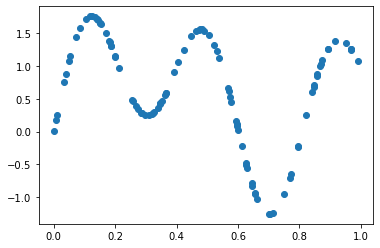

In [31]:
x = np.sort(np.random.uniform(size=100))
y = np.sin(2 * np.pi * x) + np.sin(5 * np.pi * x) + x
plt.scatter(x, y)

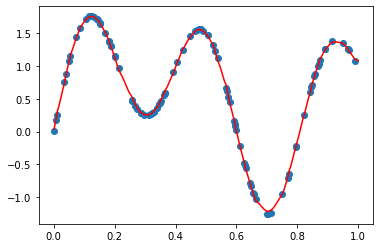

In [49]:
A = 2

diff = x[1:] - x[:-1]

weights = np.append(-2 * A / diff, -2 * A / diff[-1])
bias = np.append((x[1:] + x[:-1]) / diff * A, (3 * x[-1] + x[-2]) / diff[-1] * A)
comb_weights = np.append(y[:-1] - y[1:], y[-1])

x_ref = np.linspace(0, 1, 1000)[:, np.newaxis]
y_interp = sigmoid(torch.tensor(weights * x_ref + bias)) @ torch.tensor(comb_weights[:, np.newaxis])

plt.scatter(x, y)
plt.plot(x_ref, y_interp, c='red')

## (re)Sources
- Rosenblatt’s perceptron, the first modern neural network ([blog post](https://towardsdatascience.com/rosenblatts-perceptron-the-very-first-neural-network-37a3ec09038a))
- Neural Network in 11 lines of code ([blog post](https://iamtrask.github.io/2015/07/12/basic-python-network/))
- Favio Vázquez [posts](https://medium.com/@faviovazquez)
- Neural Networks with good MNIST [demo](https://ml4a.github.io/ml4a/neural_networks/)
- Legendary Andrew Ng [course](https://www.coursera.org/learn/machine-learning)
- Veritasium [video](https://www.youtube.com/watch?v=GVsUOuSjvcg)
- Neural Networks and Deep Learning: [A Textbook](https://www.amazon.com/Neural-Networks-Deep-Learning-Textbook/dp/3319944622)